<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [18]:
import sys
sys.path.insert(0,"./src")
import mynnet7 as nn
import mxnet as mx
import random
from imports import *

In [7]:
interm_dir4='/home/mas/x110/data'
train_data_path=interm_dir4+'/Train23Oct2018augment.rec'
train_idx_path=interm_dir4+'/idx_Train23Oct2018augment.idx'

In [10]:
x_mean=.2815
x_std=.2807
BATCH_SIZE=5
train_iter=nn.FileIter(train_data_path,train_idx_path,batch_size=BATCH_SIZE,do_augment=False,mean_image=x_mean,std_image = x_std)
input_shapes = dict(train_iter.provide_data+train_iter.provide_label)
print(input_shapes)

{'data': (5, 1, 32, 32, 32), 'softmax_label': (5, 32768)}


In [22]:
if True:
    model_path = "/home/mas/x110/model/oct22"
    model_epoch=499
    network, arg_params, aux_params = mx.model.load_checkpoint(model_path , model_epoch)

    # Binding
    exe = network.simple_bind(ctx=mx.gpu(0), **input_shapes)
    # get handle to input arrays
    arg_arrays = dict(zip(network.list_arguments(), exe.arg_arrays))
    data = arg_arrays[train_iter.provide_data[0][0]]
    label = arg_arrays[train_iter.provide_label[0][0]]


    exe.copy_params_from(arg_params, aux_params)

In [23]:
BATCH_SIZE=1
valid_iter=nn.FileIter(train_data_path,train_idx_path,batch_size=BATCH_SIZE,do_shuffle=False,mean_image=x_mean,std_image = x_std)

In [24]:
def get_sample_at(valid_iter,n):
    valid_iter.ind2=[n]
    return valid_iter.next()

In [25]:
from imports import *

In [27]:
arg_arrays = dict(zip(network.list_arguments(), exe.arg_arrays))
data = arg_arrays[train_iter.provide_data[0][0]]
label = arg_arrays[train_iter.provide_label[0][0]]

index = 10


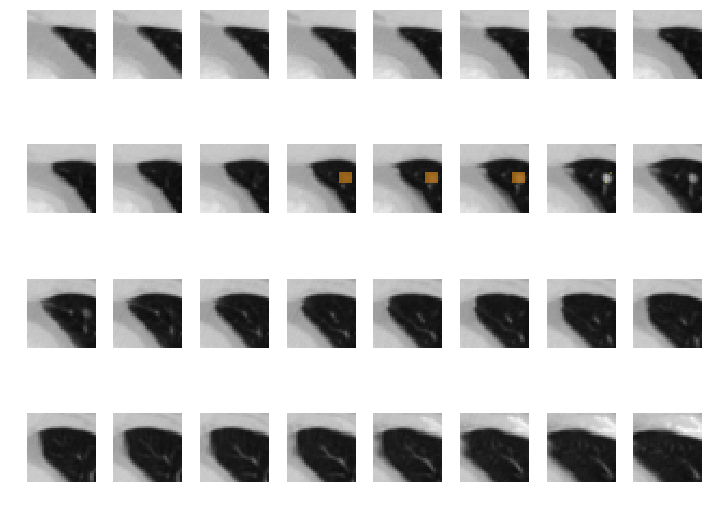

In [28]:
K = valid_iter.num_data
n = random.randint(0,K)
print('index = '+ str(n))
batch = get_sample_at(valid_iter,n)


data[:] = batch.data[0]       
label[:] = batch.label[0]
# predict
outputs = exe.forward(is_train=False)


p = outputs[0][0].asnumpy().reshape(32,32,32)



X = batch.data[0][0][0].asnumpy()
Y = batch.label[0][0].asnumpy().reshape((32,32,32))
                              
img = X*x_std+x_mean
msk1 = Y
msk2 = p>.5#.001
msk2=msk2*1
msk1= np.ma.masked_where(msk1 == 0, msk1)
msk2= np.ma.masked_where(msk2 == 0, msk2)

zs=32
num_rows=np.ceil(zs/8).astype(int)
f, plots = plt.subplots(num_rows, 8, sharex='col', sharey='row', figsize=(10, 8))
for i in range(zs):
    plots[i // 8, i % 8].axis('off')
    plots[i // 8, i % 8].imshow(img[i], 'gray',vmin=0,vmax=1)
    plots[i // 8, i % 8].imshow(msk1[i],interpolation='none', cmap=plt.cm.Reds, alpha=.7, vmin=0, vmax=1)
    plots[i // 8, i % 8].imshow(msk2[i],interpolation='none',  alpha=0.4, vmin=0, vmax=1)


      
plt.tight_layout()